In [2]:
from google.colab import files
income = files.upload()

Saving income.csv to income (1).csv


In [3]:
import pandas as pd
data1 = pd.read_csv("income.csv")
df1 = pd.DataFrame(data1)
df1.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

features = df1[['age', 'education_num', 'hours_per_week']]
target = df1['income_level']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

abc = AdaBoostClassifier(n_estimators=10, random_state=42)
model1 = abc.fit(X_train,y_train)
y_pred = model1.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy with 10 trees:", score)

best_score = 0
best_n_estimators = 0

for n_estimators in range(10, 201, 10):
  abc = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
  model = abc.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  current_score = accuracy_score(y_test, y_pred)

  if current_score > best_score:
    best_score = current_score
    best_n_estimators = n_estimators

print("Best accuracy:", best_score)
print("Best number of trees:", best_n_estimators)

Accuracy with 10 trees: 0.7954754836728427
Best accuracy: 0.8014126317944519
Best number of trees: 70


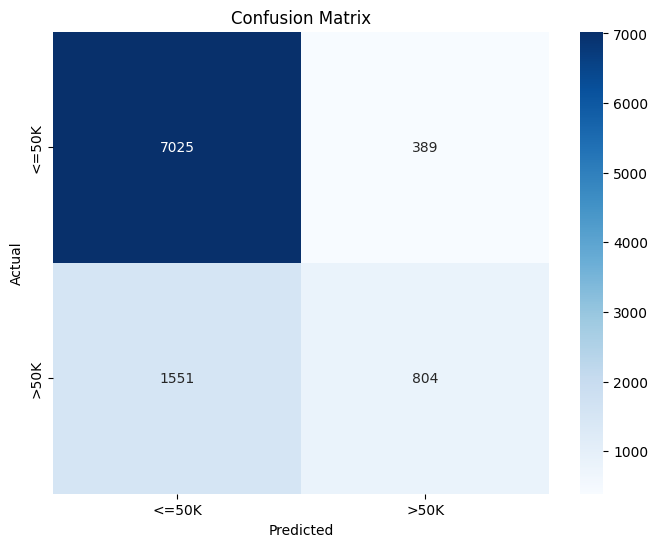

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


abc = AdaBoostClassifier(n_estimators=best_n_estimators, random_state=42)
model1 = abc.fit(X_train,y_train)
y_pred = model1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
